In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


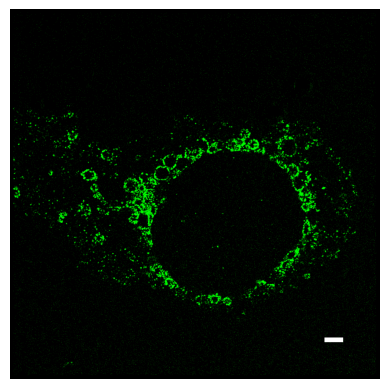

In [3]:
# Load the original image
image1 = cv2.imread("/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Dataset/image1.png")
# Display the image
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remove the axis labels
plt.show()

In [4]:
# Read the circle details from the Excel file
circle_data1 = pd.read_excel("/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Result/image1/circle_data.xlsx")
df1=pd.DataFrame(circle_data1)
df1.head(5)

,center_x,center_y,radius
0,253,376,17
1,256,406,17
2,264,341,17
3,273,375,19
4,458,263,17


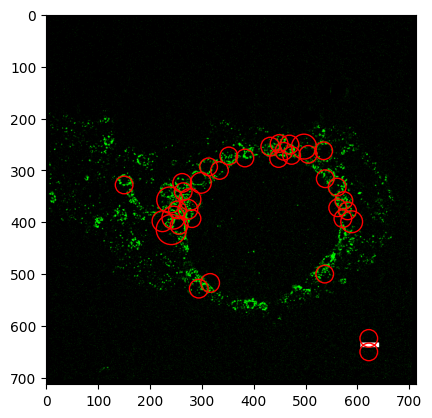

In [5]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image1)

# Plot the circles
for index, row in df1.iterrows():
    center_x = row['center_x']
    center_y = row['center_y']
    radius = row['radius']

    circle = plt.Circle((center_x, center_y), radius, color='red', fill=False)
    ax.add_artist(circle)

# Set aspect ratio to 'equal' to maintain circle shape
ax.set_aspect('equal')

# Show the plot
plt.show()

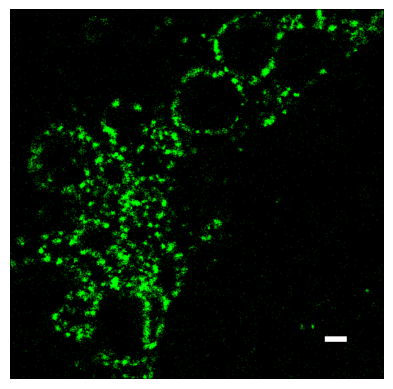

In [6]:
# Load the original image
image2 = cv2.imread("/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Dataset/image2.png")
# Display the image
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remove the axis labels
plt.show()

In [7]:

# Read the circle details from the Excel file
circle_data2 = pd.read_excel("/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Result/image2/circle_data.xlsx")
df2=pd.DataFrame(circle_data2)
df2.head(5)

,center_x,center_y,radius
0,195,499,58
1,132,421,50
2,388,63,50
3,197,381,63
4,214,249,67


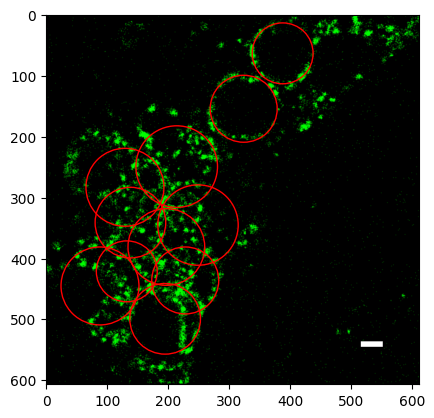

In [8]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image2)

# Plot the circles
for index, row in df2.iterrows():
    center_x = row['center_x']
    center_y = row['center_y']
    radius = row['radius']

    circle = plt.Circle((center_x, center_y), radius, color='red', fill=False)
    ax.add_artist(circle)

# Set aspect ratio to 'equal' to maintain circle shape
ax.set_aspect('equal')

# Show the plot
plt.show()

In [9]:
!pip install stardist

from stardist.models import StarDist2D

# Prints a list of available models
StarDist2D.from_pretrained()

# Creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.4 MB/s eta 0:00:00
There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
5320433/5320433 [==============================] - 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Found model '2D_demo' for 'StarDist2D'.
5298331/5298331 [==============================] - 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.486166, nms_thresh=0.5.
1/1 [==============================] - 3s 3s/step


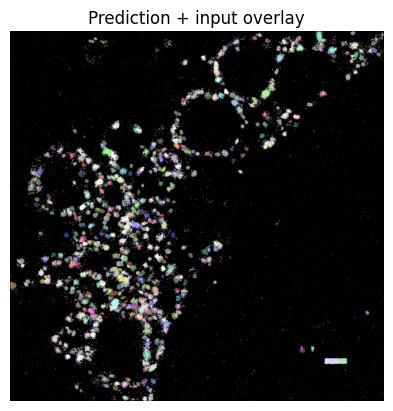

In [10]:
import cv2
import numpy as np
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

# Load your custom image
image_path = "/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Dataset/image2.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image
normalized_img = normalize(img, 1, 99.8)

# Load the pre-trained model
model = StarDist2D.from_pretrained('2D_demo')

# Predict instances using the model
labels, _ = model.predict_instances(normalized_img)

# Plot the results
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("Prediction + input overlay")

# Save the prediction and overlay image
overlay_image_path = "/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Result/image2/overlay_image.png"
plt.savefig(overlay_image_path)

plt.show()


In [11]:
import cv2
from stardist.models import StarDist2D
from skimage.measure import label, regionprops
import numpy as np

# Load the dotted image
image = cv2.imread('/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Dataset/image2.png')

# Preprocess the image (adjust as needed)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# Load the pre-trained StarDist model
model = StarDist2D.from_pretrained('2D_dsb2018')

# Perform polygon detection
labels, polygons = model.predict_instances(gray)

# Get the binary mask of detected polygons
mask = labels > 0

# Perform connected component labeling on the mask
_, binary_mask = cv2.threshold(mask.astype(np.uint8), 0, 255, cv2.THRESH_BINARY)
_, labeled_mask = cv2.connectedComponents(binary_mask)

# Get properties of each labeled region
regions = regionprops(labeled_mask)

# Filter regions based on convexity
convex_polygons = []
for region in regions:
    if region.convex_area / region.filled_area > 0.9:  # Adjust the convexity threshold as needed
        convex_polygons.append(region.convex_image)

# Draw the detected convex polygons on the original image
for polygon in convex_polygons:
    cv2.drawContours(image, [polygon.astype(np.int32)], -1, (0, 255, 0), 2)

# Display the result
cv2.imshow('Detected Convex Polygons', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Could not find model with name or alias '2D_dsb2018'


There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


AttributeError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the paths to your dataset
raw_images_dir = '/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Dataset/raw_images'
marked_images_dir = '/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Dataset/labelled_images'

In [ ]:
# Set the parameters for image preprocessing and data augmentation
batch_size = 32
target_size = (224, 224)  # Adjust the size based on your requirements

In [ ]:
# Custom generator to yield both raw and marked images
def custom_generator(raw_images_dir, marked_images_dir, batch_size, target_size):
    raw_datagen = ImageDataGenerator(rescale=1./255)
    marked_datagen = ImageDataGenerator(rescale=1./255)

    raw_generator = raw_datagen.flow_from_directory(
        raw_images_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=None,
        shuffle=True)

    marked_generator = marked_datagen.flow_from_directory(
        marked_images_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=None,
        shuffle=True)

    while True:
        raw_images = raw_generator.next()
        marked_images = marked_generator.next()
        yield raw_images, marked_images

In [ ]:
# Define the CNN model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(2)  # Output layer with 2 units for x and y coordinates of the polygons
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Create custom generator for training
train_generator = custom_generator(raw_images_dir, marked_images_dir, batch_size, target_size)

In [ ]:
# Calculate the number of raw images
num_samples = len(os.listdir(raw_images_dir))

# Calculate the number of steps per epoch
steps_per_epoch = num_samples // batch_size


In [ ]:
# Compile the model with run_eagerly=True
model.compile(optimizer='adam', loss='mean_squared_error', run_eagerly=True)

# Train the model
epochs = 10  # Adjust the number of epochs based on your requirements

for epoch in range(epochs):
    for _ in range(steps_per_epoch):
        raw_images, marked_images = next(train_generator)
        model.train_on_batch(raw_images, marked_images)


In [ ]:
# Provide the path to the new image for prediction
new_image_path = '/content/drive/MyDrive/Surge(Microscopic Image Analysis)/Dataset/additional/image_0_560.jpg'
img = cv2.imread(new_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, target_size)

In [ ]:
# Normalize the image
normalized_img = img / 255.0


In [ ]:
# Reshape the image to match the input shape of the model
input_img = np.expand_dims(normalized_img, axis=0)

In [ ]:
# Perform prediction
prediction = model.predict(input_img)

1/1 [==============================] - 0s 143ms/step


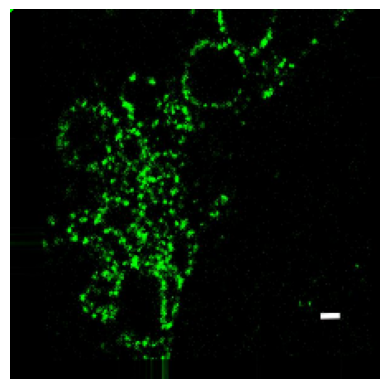

In [ ]:
# Get the predicted polygons
# Assuming the prediction is a list of coordinates (x, y) for each polygon
predicted_polygons = prediction

# Draw bounding boxes around the predicted polygons on the image
for polygon in predicted_polygons:
    polygon = np.reshape(polygon, (-1, 2))  # Reshape to 2D array
    x_min = int(np.min(polygon[:, 0]))
    y_min = int(np.min(polygon[:, 1]))
    x_max = int(np.max(polygon[:, 0]))
    y_max = int(np.max(polygon[:, 1]))

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Display the image with marked polygons
plt.imshow(img)
plt.axis("off")
plt.show()
